## **Teorema 1**

Si $A$ es una matriz $n\times n$ tal que $\Vert A\Vert <1$, entonces $A^{-1}$ es inversible y
	$$(I-A)^{-1} = \sum_{k=0}^{\infty}A^{k}$$

In [34]:
"""
Series de neuman (con la norma del máximo)


s: almacena A + A^1 + A^2 + ... + A^{MAX_ITERATIONS}
"""

import numpy as np

def max_norm(A):
    n = np.shape(A)[0]
    s = sum(A[0,:])
    for k in range(1,n):
        if s < sum(A[k,:]):
            s = sum(A[k,:])
            
    return s

def neumann(A, MAX_ITERATIONS=1000): # calcula la inversa de I-A
    if max_norm(A) < 1:
        n = np.shape(A)[0]
        s = np.identity(n)
        for k in range(MAX_ITERATIONS):
            s += A
            A = np.dot(A, A)
            
        return s
    else:
        print("La matriz\n{}\n puede no ser inversible".format(I-A))
        
        
"""
Análisis de Error del cálculo de la inversa por el método de series de Neumann(con la norma del máximo)
"""

import scipy.linalg as sl

#calcula el error cometido al aproximar (I-A)^{-1} por series de nuemann
def error_nuemann(A, MAX_ITERATIONS=10): 
    n = np.shape(A)[0]
    s = np.identity(n)
    inversa = sl.inv(np.identity(n)-A) #inversa: es la inversa de I-A
    
    error_per_iteration = np.array([max_norm(inversa-s)])
    
    for i in range(MAX_ITERATIONS):
        s += A
        A = np.dot(A, A)
        error_per_iteration = np.append(error_per_iteration, max_norm(inversa-s))
    
    return error_per_iteration
                

**Ejercicio de Aplicación**  
Use la se serie  de Neumann para calcular la inversa de la matriz.
$$B = \begin{bmatrix}
0.9 &-0.2 &-0.3\\
0.1 &1.0  &-0.1\\
0.3 &0.2  &1.1
\end{bmatrix}$$
Use la norma del máximo.

B^(-1) = 
[[ 1.01217284  0.16486913  0.31756543]
 [-0.13513087  0.96486913  0.06486913]
 [-0.28243457 -0.23513087  0.81217284]]

BxB^(-1) =
[[ 0.9 -0.2 -0.3]
 [ 0.1  1.  -0.1]
 [ 0.3  0.2  1.1]]


Text(0.5, 1.0, 'Error vs Número de Iteraciones')

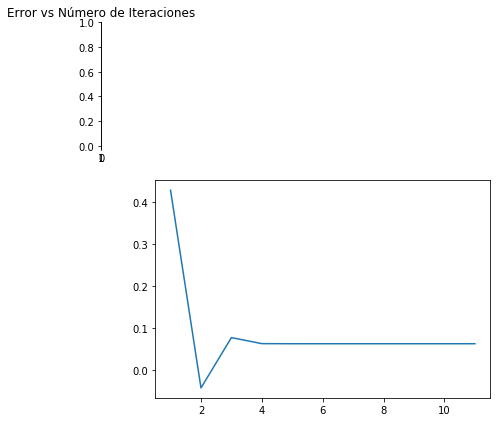

In [36]:
"""
Ilustración de solución:

Si A = I-B, tenemos que ||A||=0.6 <1, luego (I-A)^{-1} = B^{-1} = I + A +A^2 +A^3 + ....  
"""

import numpy as np
import matplotlib.pyplot as plt


B = np.array([0.9, -0.2, -0.3, 0.1 ,1.0, -0.1, 0.3, 0.2, 1.1], dtype=np.float64).reshape(3,3)

n = np.shape(B)[0]
A = np.identity(n)-B

invB = neumann(A) # inversa de B

print("B^(-1) = \n{}\n".format(invB))
print("BxB^(-1) =\n{}".format(B, invB, np.dot(B, invB)))


# gráfica de error de aproximación de (I-A)^{-1} vs iteración (metodo de series de neumann)

error = error_nuemann(A)

idn = np.identity(n)
max_error = max_norm(sl.inv(idn-A) -idn)

plt.plot(np.arange(1, len(error)+1), error)
plt.axes([0, iterations, 0, max_error])
plt.title("Error vs Número de Iteraciones")

